# MVP Sprint III - Engenharia de Softwares inteligentes

## Aluno: Gabriel Pedersoli Lopes

## Importação das bibliotecas

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pickle import dump
from pickle import load

## Importação, carregamento e normalização do dataset

In [ ]:
# Carregamento do dataset

# URL de importação do dataset
url = "https://raw.githubusercontent.com/gabriel1680/heart-disease-predictor/main/api/data/dataset.csv"

# Lê o arquivo utilizando as colunas informadas
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "num"]
dataframe = pd.read_csv(url, skiprows=0, delimiter=',', usecols=cols)

# Remove as linhas que possuem o valor '?' das colunas informadas
dataset = dataframe.query("chol != '?' & fbs != '?' & trestbps != '?'")

# Mostra as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,num
0,28,1,2,130,132,0,0
1,29,1,2,120,243,0,0
3,30,0,1,170,237,0,0
4,31,0,2,100,219,0,0
5,32,0,2,105,198,0,0


## Separação dos conjuntos de treino e teste, com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação dos dados (características e target)
array = dataset.values
X = array[:,0:6]
y = array[:,6].astype(int) # casting object -> int

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed) # validação cruzada com estratificação
scoring = "accuracy" # definindo o tipo de scoring

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.541429 (0.095619)
CART: 0.675476 (0.106990)
NB: 0.732143 (0.088007)
SVM: 0.641190 (0.031081)


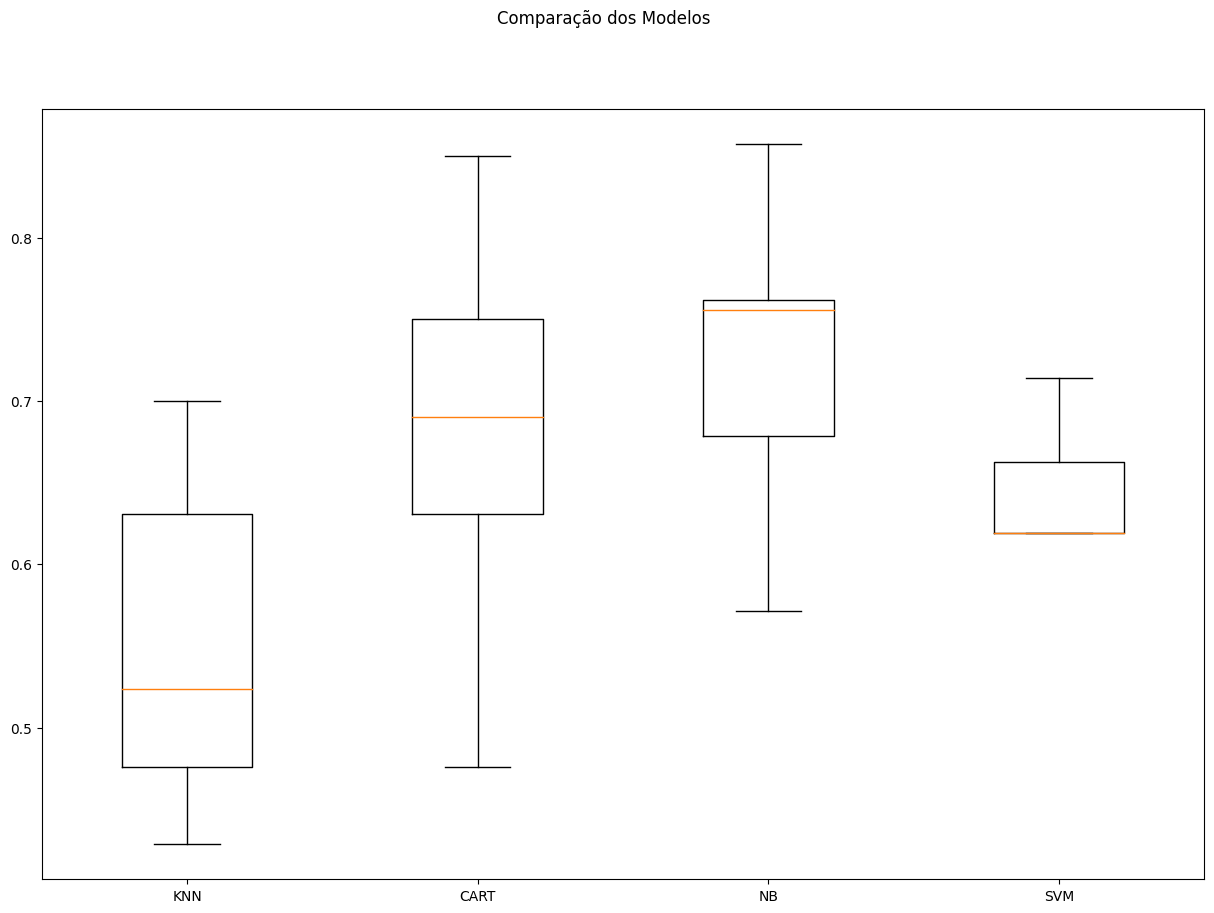

In [ ]:
np.random.seed(seed) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Crianção das listas de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.541 (0.096)
CART-orig: 0.675 (0.107)
NB-orig: 0.732 (0.088)
SVM-orig: 0.641 (0.031)
KNN-padr: 0.732 (0.064)
CART-padr: 0.666 (0.096)
NB-padr: 0.732 (0.088)
SVM-padr: 0.760 (0.049)
KNN-norm: 0.746 (0.072)
CART-norm: 0.641 (0.090)
NB-norm: 0.732 (0.088)
SVM-norm: 0.780 (0.055)


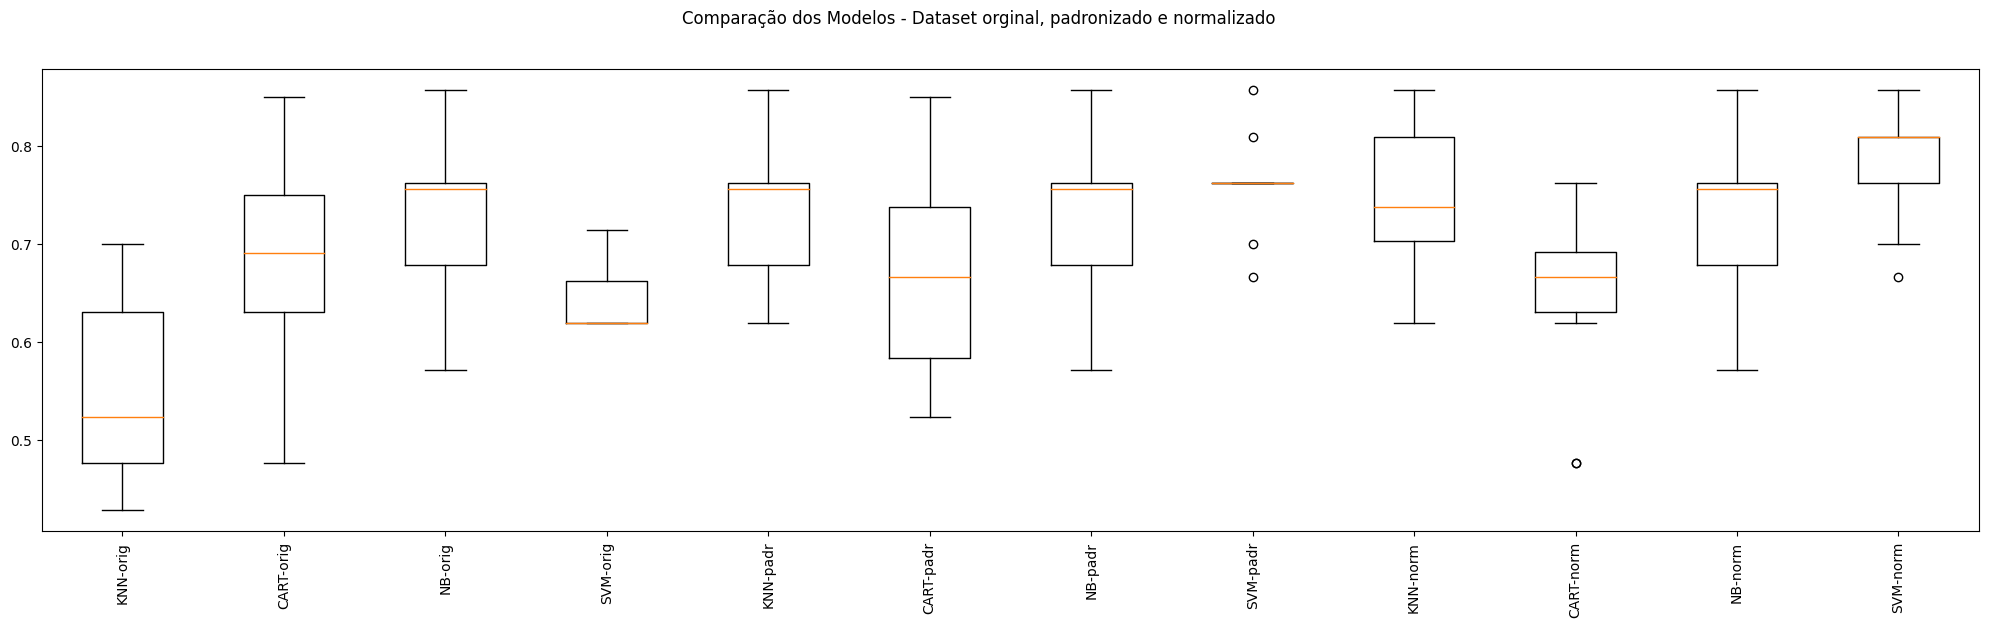

In [ ]:
# semente global para este bloco
np.random.seed(seed)

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criação dos elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()))

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Pode-se notar que pela validação cruzada o modelo que se saiu melhor na comparação utilizando o parâmetro escolhido (acurácia), foi o SVM com dados normalizados. O modelo alcançou uma acurácia de 78,00%.

O próximo passo é testar as mesmas configurações dos modelos, mas agora com a otimização dos hiperparâmetros e verificar se haverá alguma alteração nos resultados.

## Otimização de hiperparâmetros e seleção do modelo (pode demorar até 2 min)



#### Definição de funções e variáveis que serão utilizadas nesse bloco

In [ ]:
# semente global
np.random.seed(seed)

# Lista com os melhores resultados para a comparação
models_results = []


def measure_model_with_optimized_hyperparams(model_name, model, param_grid):
  """Função para gerar os melhores valores de cada modelo com otimização de parâmetros.
  """
  # Transformações que serão utilizadas
  standard_scaler = ('StandardScaler', StandardScaler())
  min_max_scaler = ('MinMaxScaler', MinMaxScaler())

  # Criação do pipeline
  pipelines = []
  pipelines.append(("%s-orig" % model_name, Pipeline([model])))
  pipelines.append(("%s-padr" % model_name, Pipeline([standard_scaler, model])))
  pipelines.append(("%s-norm" % model_name, Pipeline([min_max_scaler, model])))

  # Preparação e execução do GridSearchCV + preenchimendo dos resultados
  for name, model in pipelines:
      grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
      grid.fit(X_train, y_train)
      # Preenchimento da lista com os resultados
      models_results.append((name, grid.best_score_, grid.best_params_))
      print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


def get_chart_axis_data():
  """Gera os valores do eixo do gráfico de plot.
  """

  labels = []
  scores = []
  for name, score, params in models_results:
    labels.append(name)
    scores.append(score)

  return labels, scores


def get_result():
  """Gera a estrutura de resultado para o plot.
  """

  result = { 'model': None, 'score': 0.0, 'params': None }
  for name, score, params in models_results:

    if score >= result["score"]:
      result["score"] = score
      result["model"] = name
      result["params"] = params

  return result

#### Teste dos modelos com otimização de hiperparâmetros

In [ ]:
# Algoritmos que serão utilizados

knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
svm = ('SVM', SVC())
nb = ('NB', GaussianNB())

# Tuning dos hiperparâmetros dos algoritmos utilizados

param_grid_knn = {
    'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"]
}

param_grid_cart = {
  'CART__max_depth': list(range(10)),
  'CART__min_samples_leaf': list(range(10))
}

param_grid_svm = {
  'SVM__C': [0.1, 1, 10],
  'SVM__gamma': ['scale', 'auto'],
  'SVM__kernel': ['linear', 'rbf', 'sigmoid']
}

param_grid_nb = {
  'NB__var_smoothing': np.logspace(0,-9, num=100)
}

# Geração dos melhores com as melhores combinações de hiperparâmetros

measure_model_with_optimized_hyperparams("knn", knn, param_grid_knn)
measure_model_with_optimized_hyperparams("cart", cart, param_grid_cart)
measure_model_with_optimized_hyperparams("svm", svm, param_grid_svm)
measure_model_with_optimized_hyperparams("nb", nb, param_grid_nb)

knn-orig - Melhor: 0.641429 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}
knn-padr - Melhor: 0.779524 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}
knn-norm - Melhor: 0.794048 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
cart-orig - Melhor: 0.789048 usando {'CART__max_depth': 2, 'CART__min_samples_leaf': 8}
cart-padr - Melhor: 0.789048 usando {'CART__max_depth': 2, 'CART__min_samples_leaf': 8}
cart-norm - Melhor: 0.789048 usando {'CART__max_depth': 2, 'CART__min_samples_leaf': 8}
svm-orig - Melhor: 0.750952 usando {'SVM__C': 0.1, 'SVM__gamma': 'scale', 'SVM__kernel': 'linear'}
svm-padr - Melhor: 0.765000 usando {'SVM__C': 1, 'SVM__gamma': 'scale', 'SVM__kernel': 'linear'}
svm-norm - Melhor: 0.779524 usando {'SVM__C': 1, 'SVM__gamma': 'auto', 'SVM__kernel': 'rbf'}
nb-orig - Melhor: 0.751190 usando {'NB__var_smoothing': 1.873817422860383e-05}
nb-padr - Melhor: 0.736905 usando {'NB__var_smoothing': 0.04328761281083057}
nb-norm - Melhor: 0.760714 u

#### Comparação dos modelos com hiperparâmetros otimizados

O modelo knn-norm, obteve o melhor resultado (acurácia de 79.40%) com os parâmetros {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}



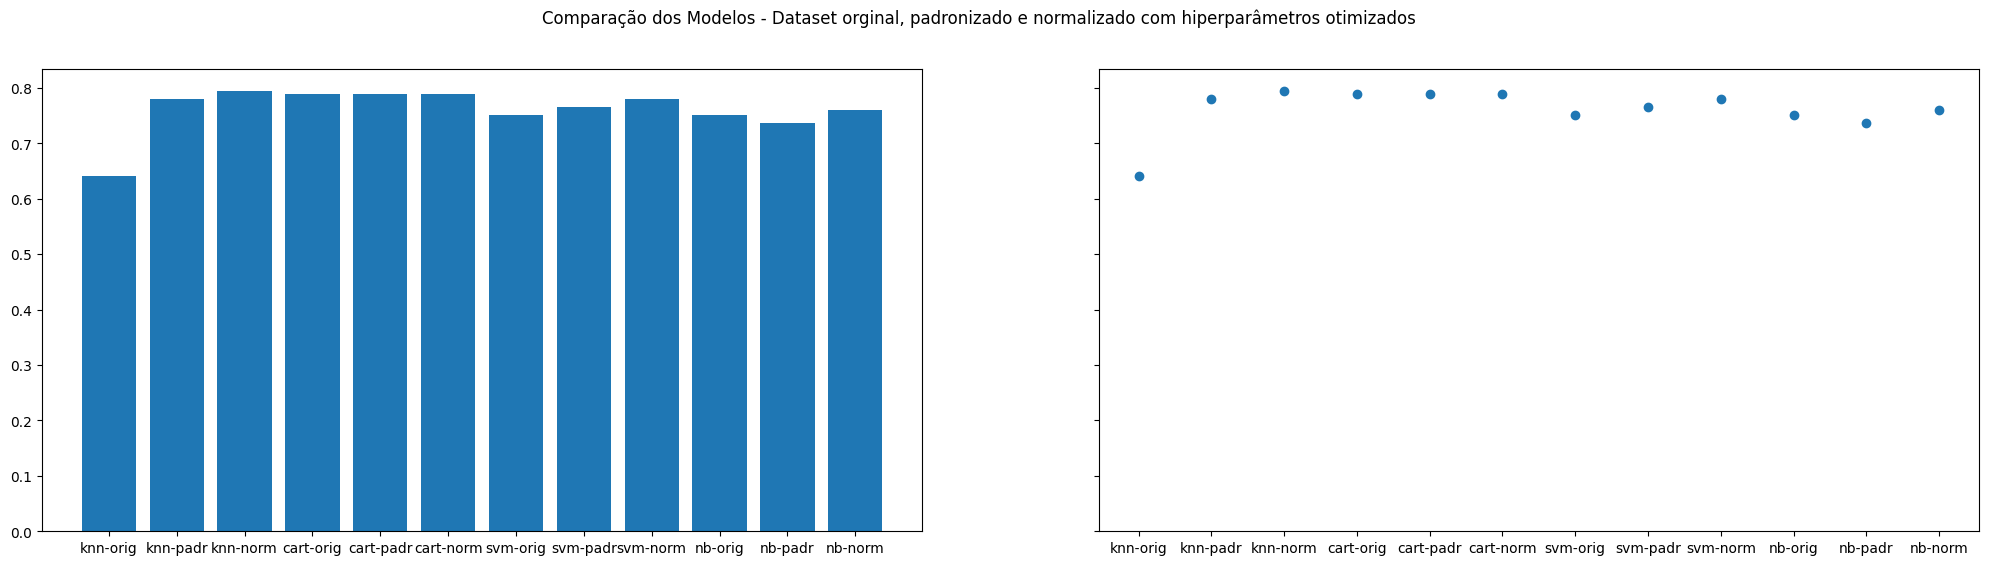

In [ ]:
# Melhor modelo e suas as configurações
result = get_result()
print("O modelo %s, obteve o melhor resultado (acurácia de %.2f%%) com os parâmetros %s\n" % (result["model"], result["score"] * 100, result['params']))

# Boxplot de comparação dos modelos
labels, scores = get_chart_axis_data()
fig, axs = plt.subplots(1, 2, figsize=(25, 6), sharey=True)
axs[0].bar(labels, scores)
axs[1].scatter(labels, scores)
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado com hiperparâmetros otimizados')
plt.show()

Após a obtenção dos resultados para os modelos com as otimizações de hiperparâmetros, o modelo com o melhor resultado foi o KNN com o algoritmo manhatan e distância k = 9, atingindo uma acurácia de 79,40%.

Com o modelo e suas configurações escolhidos, devemos agora treiná-lo com os dados teste, verificar sua acurácia e por fim salvá-lo em um arquivo pickle, que será posteriormente utilizado no projeto.

## Finalização do modelo e armazenamento

### Finalização do modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaled_X = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=9)
model.fit(rescaled_X, y_train)

# Estimativa da acurácia no conjunto de teste
rescaled_test_X = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaled_test_X)
print(accuracy_score(y_test, predictions))

0.8301886792452831


In [ ]:
# Preparação do modelo com todo o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com todo o dataset
rescaled_X = scaler.transform(X) # aplicação da padronização com todo o dataset
model.fit(rescaled_X, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

### Armazenamento

In [ ]:
# Salva o modelo no disco
filename = 'model.pkl'
dump(model, open(filename, 'wb'))

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - (não se sabe a classe)
data = {
  "age":  [58, 35, 42],
  "sex": [1, 1, 0],
  "cp": [3, 2, 1],
  "trestbps": [125, 110, 135],
  "chol": [305, 161, 184],
  "fbs": [1, 0, 0],
}

# Criação do data frame
df = pd.DataFrame(data)

# Extração dos valores
entry_array = df.values

# Casting dos valores para float
X_entry = entry_array[:,0:8].astype(float)

# Predição de classes dos dados de entrada
loaded_model = load(open(filename, 'rb')) # Carrega o modelo do disco
results = loaded_model.predict(X_entry)
print("\nResultados")
print(results)


Resultados
[1 1 0]
